<a href="https://colab.research.google.com/github/teach65qualcomm/NLP-PREPROCESSING/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
With the growing importance of social media in shaping public opinion, organizations increasingly rely on platforms like Twitter to gauge customer sentiment and brand perception. However, extracting meaningful insights from the vast amount of unstructured data on Twitter can be challenging. Many corporate teams lack the technical skills to analyze sentiment effectively or visually communicate findings in a way that drives actionable decisions. This gap in expertise hinders organizations from leveraging real-time feedback to improve customer engagement, enhance product offerings, and address reputational risks.

# **Objective**
The objective of this corporate training program is to empower participants with the skills and tools required to perform sentiment analysis on Twitter data. Through hands-on sessions, participants will learn how to collect, analyze, and visualize Twitter data using modern tools and techniques. By the end of the training, participants will be equipped to:

1) Extract and preprocess Twitter data for sentiment analysis.

2) Apply natural language processing (NLP) techniques to classify sentiments (positive, negative, neutral).

3) Design and interpret visualizations that clearly communicate sentiment trends and insights to stakeholders.

4) Leverage the analysis to inform strategic decisions, improve customer relations, and manage brand reputation.

This training will enhance organizational capability in social media analytics, fostering data-driven decision-making and improving competitive advantage.

In [ ]:
!pip install nltk
import nltk

In [ ]:
#download the necessary models for each task
nltk.download('punkt')  # Download the tokenizer models
nltk.download('punkt_tab')
nltk.download('wordnet')  # Download WordNet, required for semantic analysis for lemmatization
nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')  # Download POS tagger
nltk.download('omw-1.4')  # Download the WordNet OMW corpus

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
data=pd.read_csv("twitter_data.csv",encoding="ISO-8859-1")

In [ ]:
data.head()

ItemID  Sentiment                                      SentimentText
0       1          0                       is so sad for my APL frie...
1       2          0                     I missed the New Moon trail...
2       3          1                            omg its already 7:30 :O
3       4          0            .. Omgaga. Im sooo  im gunna CRy. I'...
4       5          0           i think mi bf is cheating on me!!!   ...

In [ ]:
data.isnull().sum()

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

# **Remove Unwanted Spaces**

In [ ]:
data["SentimentText"][5]

'         or i just worry too much?        '

In [ ]:
data["SentimentText"][5].strip()

'or i just worry too much?'

In [ ]:
data["SentimentText"]=data["SentimentText"].map(lambda x:x.strip())

# **Remove Username**

In [ ]:
for i in data["SentimentText"][0:100]:
    if "@" in i:
        print(i)

hmmmm.... i wonder how she my number @-)
I just cut my beard off. It's only been growing for well over a year. I'm gonna start it over. @shaunamanu is happy in the meantime.
@ginaaa &lt;3 GO TO THE SHOW TONIGHT
@Spiral_galaxy @YMPtweet  it really makes me sad when i look at Muslims reality now
and the entertainment is over, someone complained properly..   @rupturerapture experimental you say? he should experiment with a melody
I wanna be at home @ church...I wonder wht they are doing?
I will send sunshine to Northern Ireland, are you going swimming today @kezbat
I wish I could go to T4 On The Beach :'(    Would be great to see @Shontelle_Layne &amp; @DanMerriweather


In [ ]:
q=data["SentimentText"][99987]

In [ ]:
re.findall("@\w+",q)

['@Cupcake_Dollie']

In [ ]:
data["sentiment_clean"]=data["SentimentText"].apply(lambda x : re.sub("@\w+","",x))

# **Remove Hyperlinks**

In [ ]:
for i in data["sentiment_clean"][0:100]:
    if "http" in i:
        print(i)

awhhe man.... I'm completely useless rt now. Funny, all I can do is twitter. http://myloc.me/27HX
-- Meet your Meat http://bit.ly/15SSCI
(: !!!!!! - so i wrote something last week. and i got a call from someone in the new york office... http://tumblr.com/xcn21w6o7
friends are leaving me 'cause of this stupid love  http://bit.ly/ZoxZC
go give ur mom a hug right now. http://bit.ly/azFwv
- I love you guys so much that it hurts. http://tumblr.com/xkh1z19us
- Longest night ever.. ugh! http://tumblr.com/xwp1yxhi6


In [ ]:
p="http:\/\/\S+"
data["sentiment_clean"]=data["sentiment_clean"].apply(lambda x :re.sub(p,"",x))

In [ ]:
for i in data["sentiment_clean"][10000:100000]:
    if "http" in i:
        print(i)

&quot;The Gmail gadget does not support the &quot;Always use https&quot;&quot; grr doofes igoogle  will aber kein http nutzen........
()Went to see Bob Dylan last night, was amazin'  Going to work soon. I was put on till 13 for my first ever shift! http ...
 and who's this? https://twitter.com/frillneck and bakit wala si baylee?
 wish you were coming villey  mehhhh.You at least get the chance to avoid being in photos like this https://twitpic.com/884td
 https worked for me in some cases hehe
 yes, but to do the same thing with cURL it's like 4 times as long. I was thinking cURL was the only way to get http headers
 You should try using https://destroytwitter.com/ Really neat twitter app
 DUNNO    What does 'can't open' mean? http//thejoshuablog.com
 our addiction is killing meee!  grabe pg stalk mo ah! hehe  http:www.twitter.com/duchess07 http:www.plurk.com/Eesshh


In [ ]:
p="https:\/\/\S+|http:\/\/\S+|http:\S+|http\/\/\S+|http:|https|http"
data["sentiment_clean"]=data["sentiment_clean"].apply(lambda x :re.sub(p,"",x))

In [ ]:
for i in data["sentiment_clean"][0:100000]:
    if "http" in i:
        print(i)

# **Remove Punctuation**

In [ ]:
data["sentiment_clean"]=data["sentiment_clean"].map(lambda x :" ".join([i.lower() for i in nltk.word_tokenize(x) if i.isalpha()]))

# **Lemmatizer**

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
ls=WordNetLemmatizer()

In [ ]:
data["sentiment_clean"][16]

'awhhe man i completely useless rt now funny all i can do is twitter'

In [ ]:
data["sentiment_clean"]=data["sentiment_clean"].map(lambda x :" ".join([ls.lemmatize(j,pos="v") for j in x.split() if j not in stopwords.words("english")]))

Visualizing Data through a Word Cloud Matrix for Negative Tweets to Identify Potential Negative Words or Most Frequently Used Terms in User Comments

In [ ]:
from wordcloud import WordCloud

In [ ]:
data_negative=data.loc[data["Sentiment"]==0,"sentiment_clean"]

In [ ]:
negative_corpus=" ".join([i for i in data_negative])

In [ ]:
negative_corpus

'sad apl friend miss new moon trailer omgaga im sooo im gunna cry dentist since suposed get crown put think mi bf cheat worry much sunny work tomorrow tv tonight must think positive weekend suck far jb isnt show australia ok thats win lt way feel right awhhe man completely useless rt funny twitter huge roll thunder scary cut beard grow well year gon na start happy meantime sad iran wompppp wompp lt level write massive blog tweet myspace comp shut lose lay fetal position head hospitol pull golf tourny place think something yeah bore whats wrong please tell ca bother wish could spend rest life sit go gigs seriously feeeling like shit right really want sleep nooo hours dance art assignment finish realize deep geez give girl warn atleast hate athlete appear tear acl live television miss guy think wear skinny jeans cute sweater heel really sure today meet meat horsie move saturday morning sit need work days week really dont like room bore sick wardrobe cant waiit till walk one yay sox floyd

# **Spell Checker**

In [ ]:
from spellchecker import SpellChecker

In [ ]:
no_meaning=[]
meaningful=[]
words=nltk.word_tokenize(negative_corpus)
for token in words:
  spell=SpellChecker()
  misspelled=spell.unknown([token])
  if misspelled:
    no_meaning.append(token)
  else:
    meaningful.append(spell.correction(token))

KeyboardInterrupt: 

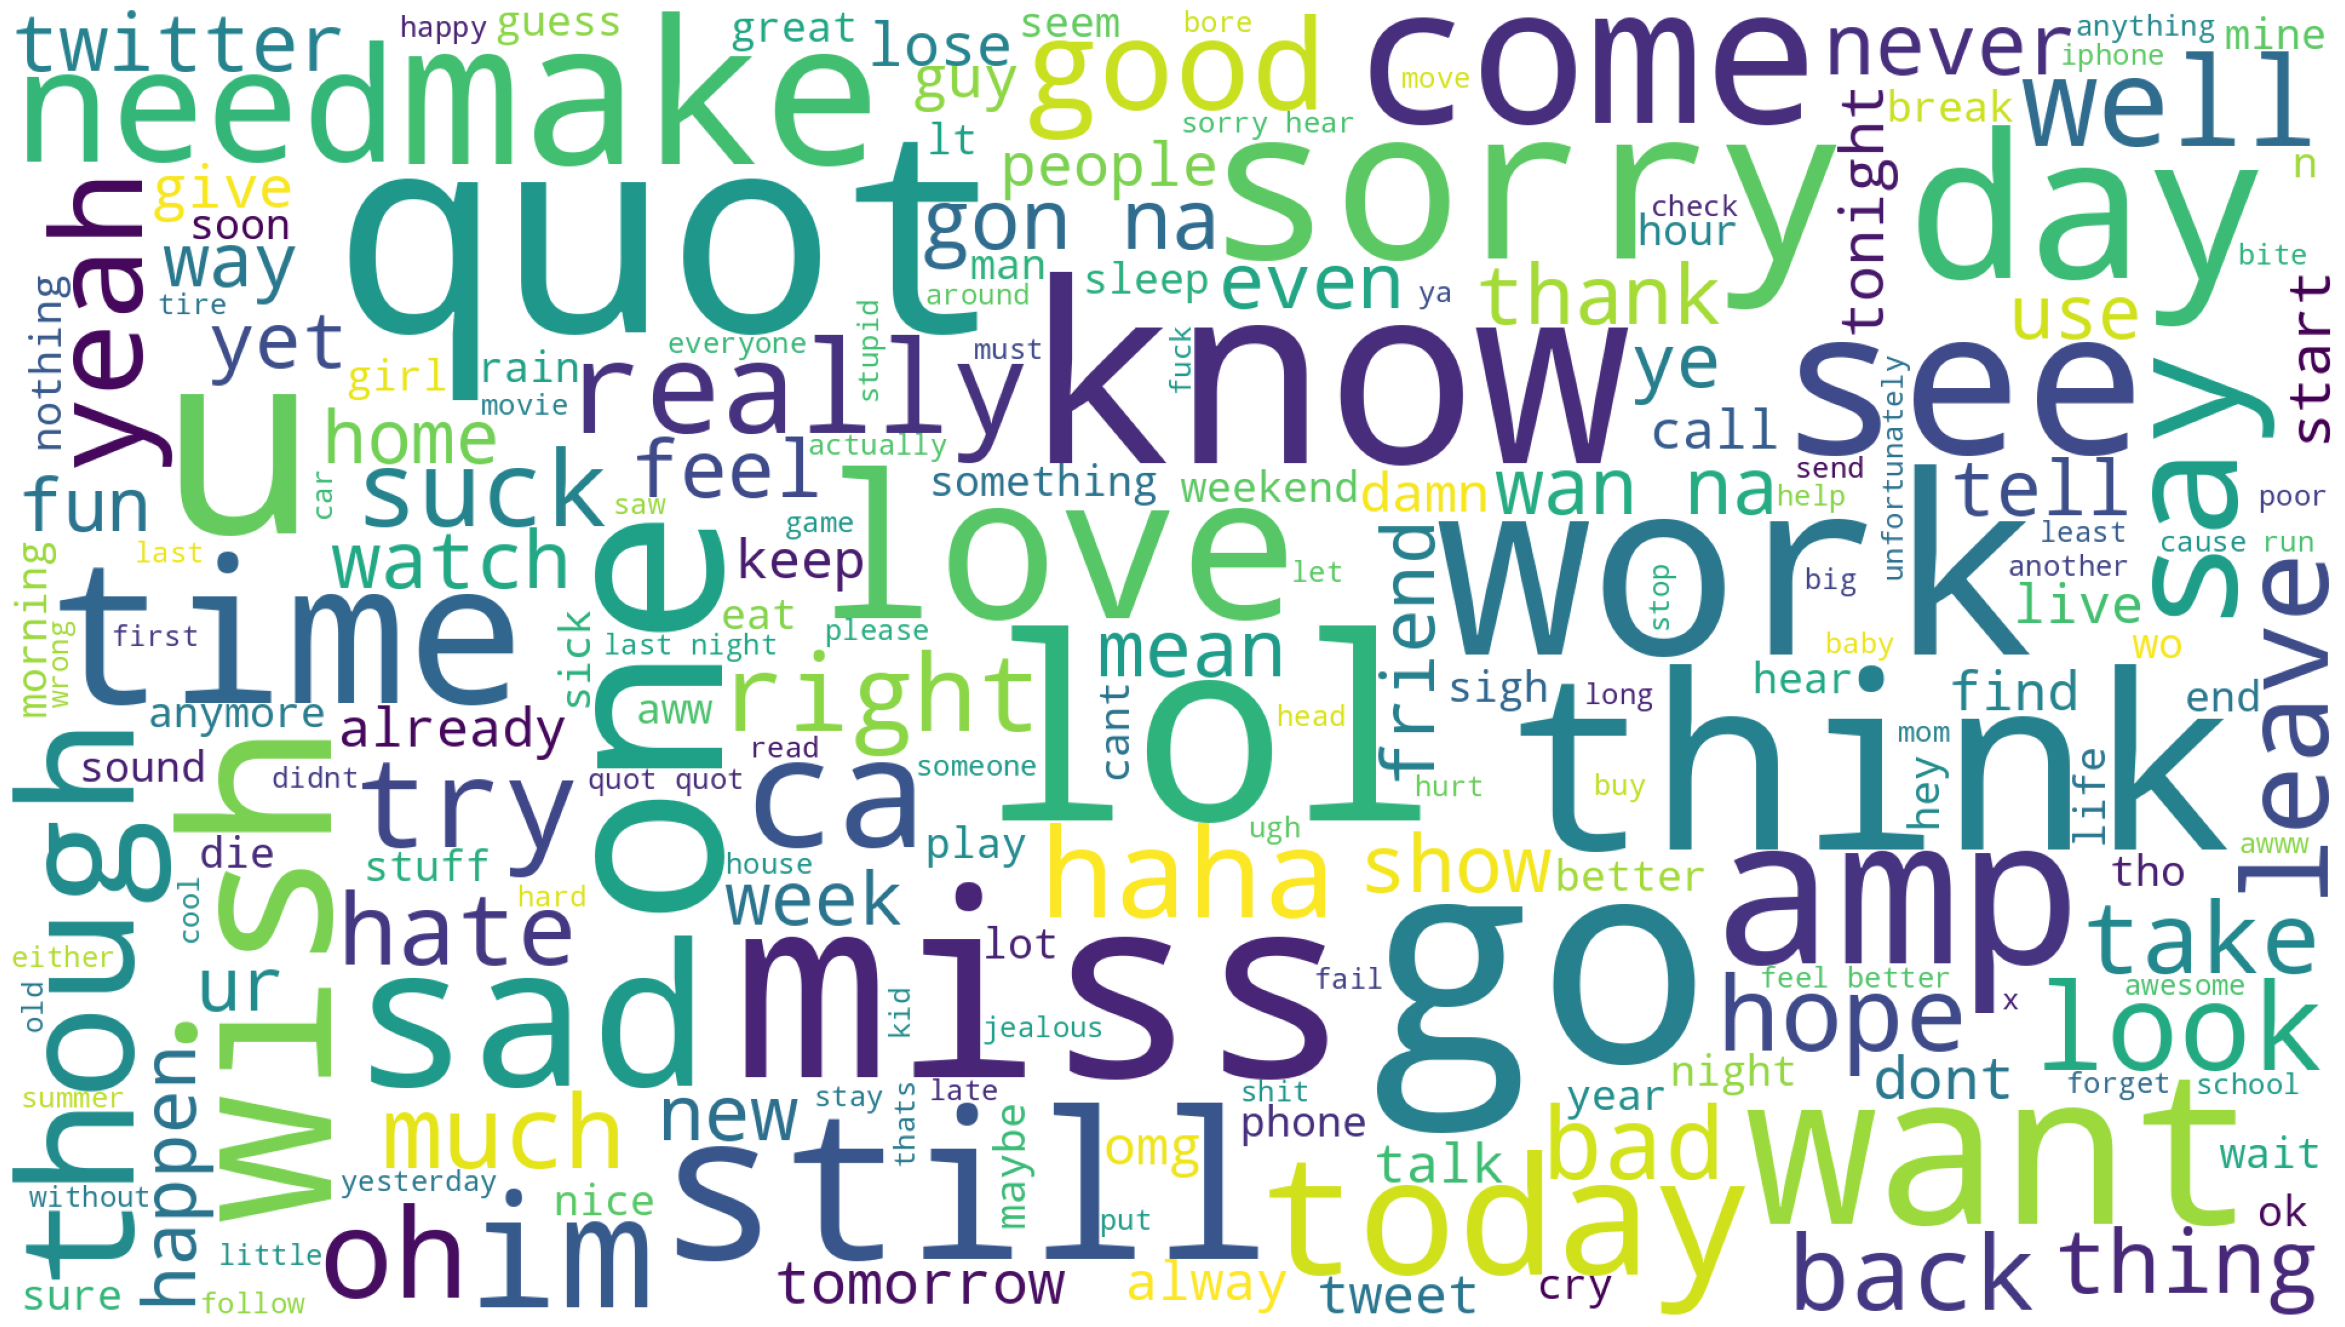

In [ ]:
wc_0=WordCloud(width=1920,height=1080,max_font_size=240, colormap="viridis",background_color='WHITE').generate(negative_corpus)
plt.figure(figsize=(30,20))
plt.imshow(wc_0)
plt.axis("off")
plt.show()

Visualizing Data through a **Word Cloud Matrix** for **Positive Tweets** to Identify Potential Positive Words or Most Frequently Used Terms in User Comments

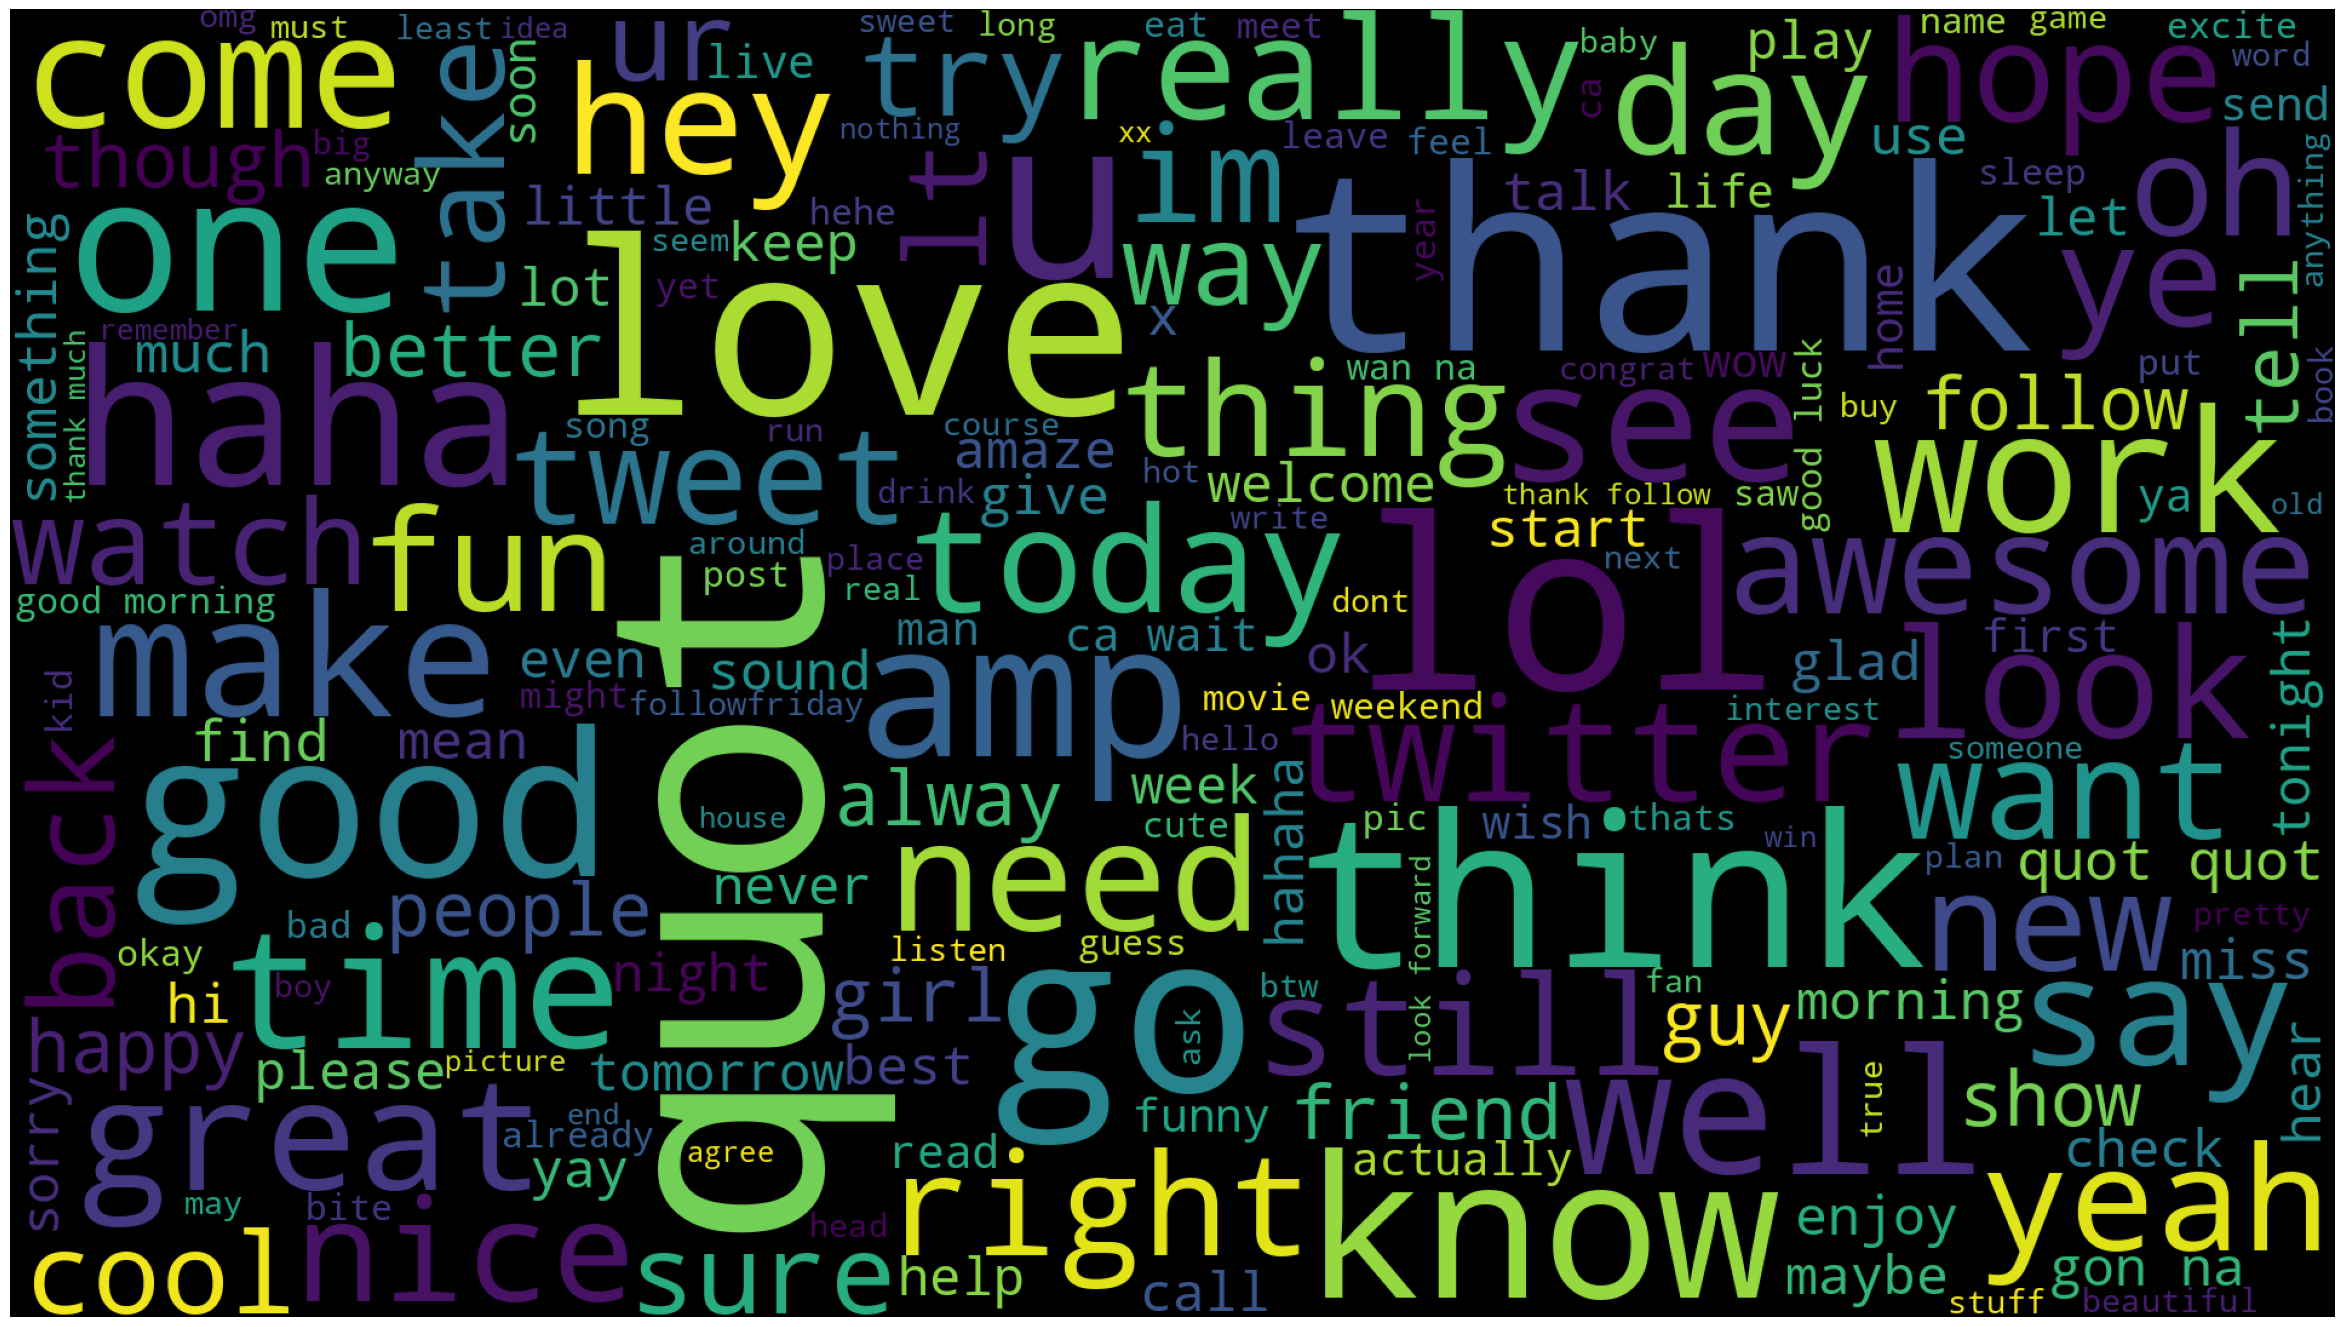

In [ ]:
words_1=" ".join([i for i in data.loc[data["Sentiment"]==1,"sentiment_clean"]])

wc_1=WordCloud(width=1920,height=1080,random_state=20,max_font_size=250).generate(words_1)
plt.figure(figsize=(30,20))
plt.imshow(wc_1)
plt.axis("off")
plt.show()